<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#UMAP" data-toc-modified-id="UMAP-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>UMAP</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', None)

# Data load

We will be using encoded data, filtered by important features that were identified in the previous step using Random Forest Classifier.

In [5]:
df_encoded = pd.read_csv('../data/encoded_data.csv', sep=',', index_col=0)

In [6]:
# The list of the important features

imp_features_to_filter_long = ['newsletter', 'master_channel_f', 'registration_payment', 
                               'with_promotion', 'sex', 'master_channel_a','master_channel_e', 
                               'master_channel_de', 'age', 'income_per_region', 'master_channel_s', 
                               'email_domain_ce', 'email_domain_oe', 'is_lead', 'population_per_region',
                               'days_from_first_click', 'email_domain_ge', 'email_domain_ae', 
                               'box_satisfaction', 'reg_month_b', 'master_channel_ps', 'reg_month_c',
                               'email_domain_hc', 'reg_month_k', 'reg_year', 'churned_1_month']

df_encoded = df_encoded[imp_features_to_filter_long]
df_encoded.shape

(26184, 26)

# Data preprocessing

We are splitting data into the independent variables (X) and the target variable (y).  

In [9]:
X = df_encoded.drop(columns=['churned_1_month', 'reg_year'])
y = df_encoded['churned_1_month']

# Dimensionality reduction

In machine learning classification problems, there are often too many factors on the basis of which the final classification is done. The higher the number of features, the harder it gets to visualize the training set and then work on it. Dimensionality reduction is the process of reducing the number of random variables by obtaining a set of principal variables. 

In our case, the features are correlated, so there is no redundancy but let's see if by using dimensionality reduction we could extract any other features which would help us in our classification problem.

## UMAP

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualization similarly to t-SNE, but also for general non-linear dimension reduction.

We will be testing UMAP with different parameters to see if we could find a way to classify our customers (churned and not churned).

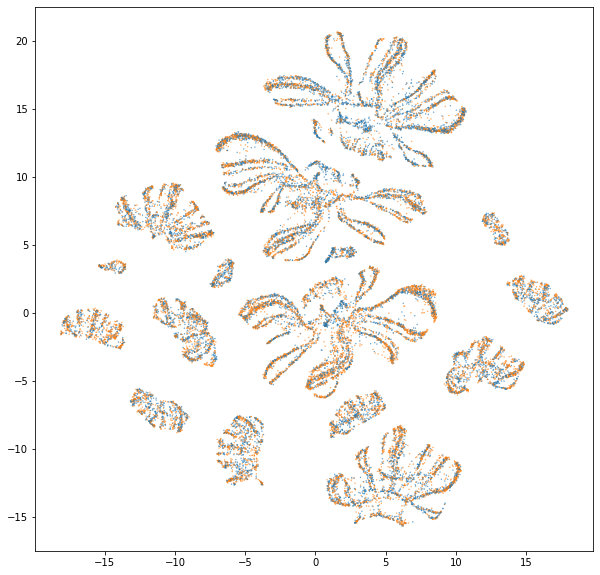

In [10]:
standard_embedding = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.5).fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=[sns.color_palette()[x] for x in y], s=0.1, cmap='Spectral');

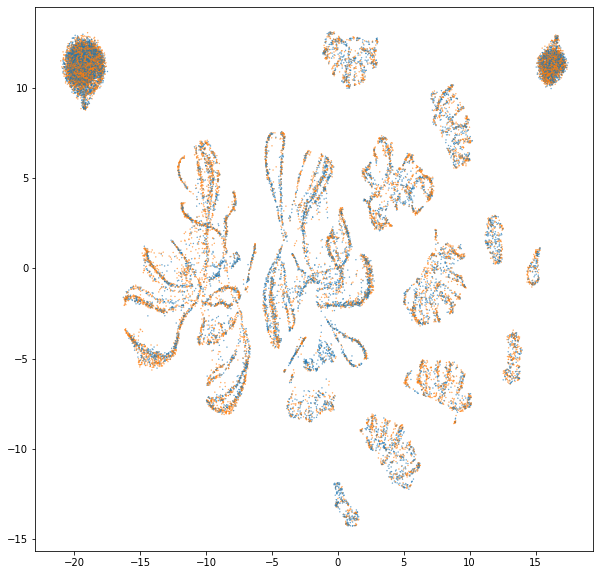

In [11]:
standard_embedding = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.5, metric='cosine').fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=[sns.color_palette()[x] for x in y], s=0.1, cmap='Spectral');

We can see that here we have data grouped but it's not separated by our target feature.

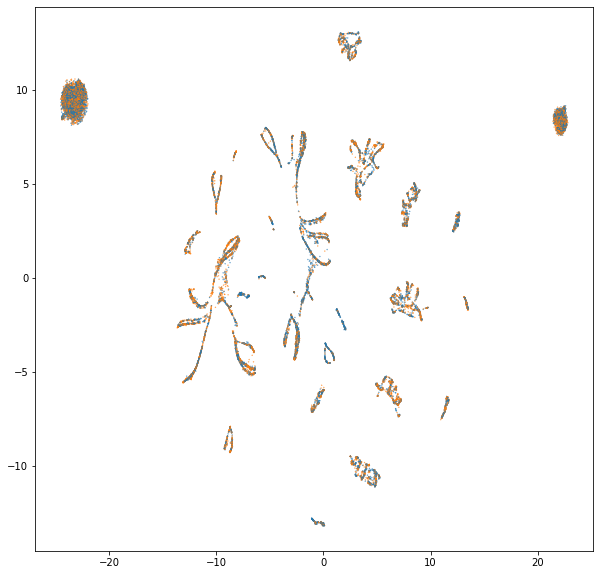

In [12]:
standard_embedding = umap.UMAP(random_state=42, n_neighbors=50, metric='cosine').fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=[sns.color_palette()[x] for x in y], s=0.1, cmap='Spectral');

None of the visualizations above show a clear separation between two groups (churned and not churned). Let's try to colour by different features:

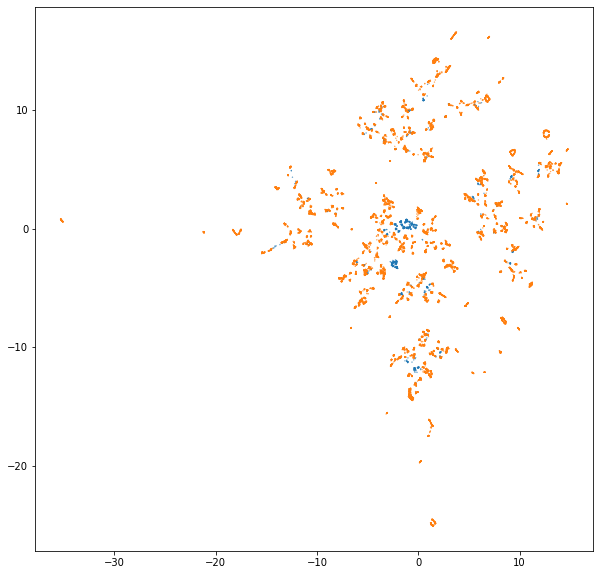

In [13]:
# Coloring by different features
standard_embedding = umap.UMAP(random_state=42, n_neighbors=50, metric='canberra').fit_transform(X)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=[sns.color_palette()[x] for x in df_encoded['with_promotion']], s=0.1, cmap='Spectral');

Data is being separated clearer when colored by different features. We will keep it in mind for future analysis. It confirms our insights from the previous analysis, data regarding churned, and not churned customers is too random.  

## PCA

We will also be implementing Principal component analysis (PCA), to see if we could get any additional information about our dataset. We will use PCA to reduce dimensionality in the data to be able to plot and hopefully understand the data better.

To use PCA, we will first scale our data:

In [14]:
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)

To start with, we will use two components:

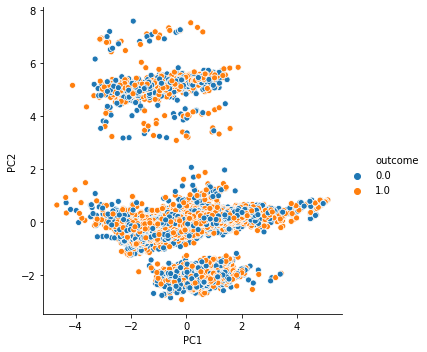

In [21]:
pca = PCA(n_components = 2, random_state=42)
pc = pca.fit_transform(X_sc)
pca_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pca_df['outcome'] = y
sns.relplot(x='PC1', y='PC2', hue='outcome', data=pca_df )
plt.show()

Let's see what percentage of data these two components are explaining:

In [16]:
pca.explained_variance_ratio_

array([0.07483543, 0.06594948])

They are only explaining 0.11 and 0.10 of our data.

Let's see if we could get better results generating 4 components. We will also create the clusters based on our target feature:

In [22]:
pca = PCA(n_components=4, random_state=42)
pc = pca.fit_transform(X_sc)
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = y
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,0.076551,-0.082958,0.448287,1.484710,1.0
1,0.408113,0.017663,-0.385333,-1.417531,1.0
2,1.993889,0.217575,-0.480701,-0.921452,1.0
3,1.112067,-0.008028,0.064459,-0.096628,1.0
4,0.073476,-0.061928,-0.061316,-0.294794,0.0


In [18]:
pca.explained_variance_ratio_

array([0.07477949, 0.06570672, 0.05749264, 0.05566762])

Again, we can see that these components almost don't explain the data. Let's visualize results and see if we could find any combination of the components what would separate our data in a better way:

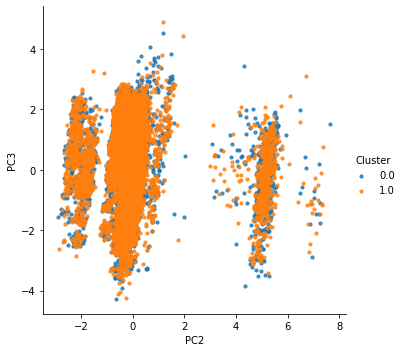

In [30]:
sns.lmplot( x="PC2", y="PC3", data=pc_df, fit_reg=False, hue='Cluster', legend=True, 
           scatter_kws={"s": 10})
plt.show()

# Conclusions

We have the same conclusion as with UMAP. Model is finding the relations between the data but it's not based on our target feature. This analysis is just confirming the previous result that the decision to cancel most of the times is not influenced by any feature, the random factor is very big.